# 일본 대학 데이터

2024년 1월 초 캐글에 일본 대학에 대한 데이터가 올라와서 이 데이터를 다운 받아 회귀선도 그어보고 분류로도 진행해보았습니다. 


분류는 National / private / public 대학으로 색을 나누어 dot으로 plot했습니다.
회귀는 학교의 어려움의 정도를 학교의 리뷰에 따라 진행했습니다. 제출된 파일에서 확인해 볼 수 있듯 선형 그래프를 나타내고 있습니다


먼저, 데이터셋의 출처 표기합니다.

https://www.kaggle.com/datasets/webdevbadger/japanese-universities

In [33]:
clear()

In [46]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = pd.read_csv('data/japanese_universities.csv')
df_j = df[[ 'name' , 'type' , 'state' ,'department_count', 'review_rating', 'review_count','difficulty_SD' ,'difficulty_rank']]
df_j = df_j.dropna()
df_j

,name,type,state,department_count,review_rating,review_count,difficulty_SD,difficulty_rank
0,Hokkaido University,National,Hokkai Do,78,4.16,1389.0,60.4,A
1,Hokkaido University of Education,National,Hokkai Do,8,3.79,544.0,47.1,D
2,Muroran Institute of Technology,National,Hokkai Do,10,3.66,126.0,39.0,F
3,Otaru University of Commerce,National,Hokkai Do,6,3.80,257.0,50.0,C
4,Obihiro University of Agriculture And Veterina...,National,Hokkai Do,5,4.20,87.0,54.5,B
...,...,...,...,...,...,...,...,...
807,Okinawa International University,Private,Okinawa Ken,15,3.95,263.0,41.6,E
808,Okinawa University,Private,Okinawa Ken,7,3.88,121.0,37.5,F
809,Okinawa Christian University,Private,Okinawa Ken,2,4.23,25.0,39.0,F
810,R Professional University of Rehabilitation,Private,Ibaraki Ken,2,2.00,1.0,37.5,F


In [47]:
df_j = df_j.set_index('name')

In [49]:

df_j['review_rating'] = df_j['review_rating']*10
df_j = df_j.sort_values('department_count', ascending = True)
# df_j = df_j[df_j['difficulty_rank']== 'A' or 'B' or 'C' or 'D' or 'E'] 
df_j = df_j[~(df_j['difficulty_rank']== 'F')]

df_j = df_j[df_j['review_count'] > 5]

In [50]:
df_j

,type,state,department_count,review_rating,review_count,difficulty_SD,difficulty_rank
name,,,,,,,
Nagaoka University,Private,Niigata Ken,1,344.0,27.0,43.0,E
Seian University of Art And Design,Private,Shiga Ken,1,375.0,35.0,53.0,C
KYOAI GAKUEN UNIVERSITY,Private,Gunma Ken,1,396.0,92.0,39.8,E
Fukuoka Jo Gakuin Nursing University,Private,Fukuoka Ken,1,452.0,34.0,40.5,E
Nara Prefectural University,Public,Nara Ken,1,354.0,85.0,51.0,C
...,...,...,...,...,...,...,...
University of Tsukuba,National,Ibaraki Ken,97,417.0,1121.0,60.4,A
Kyushu University,National,Fukuoka Ken,105,404.0,1057.0,59.1,A
Tokai University,Private,Kanagawa Ken,120,380.0,1430.0,43.4,E


In [38]:
df_j.iloc[0]

type                  Private
state               Chiba Ken
department_count            1
review_rating            36.8
review_count             11.0
difficulty_SD            38.0
difficulty_rank             F
Name: Aikoku Gakuen University, dtype: object

In [39]:

df_j
# 이걸 하니까 mae랑 r^2값이 더 줄음 근데 그래도 -2.3.. 이거 뭐야

,type,state,department_count,review_rating,review_count,difficulty_SD,difficulty_rank
name,,,,,,,
Aikoku Gakuen University,Private,Chiba Ken,1,36.8,11.0,38.0,F
Seiwa University,Private,Chiba Ken,1,31.9,27.0,37.5,F
Fukuoka Jo Gakuin Nursing University,Private,Fukuoka Ken,1,45.2,34.0,40.5,E
Tokiwakai Gakuen University,Private,Osaka Fu,1,38.2,33.0,35.0,F
Hokkaido Chitose College of Rehabilitation,Private,Hokkai Do,1,36.9,13.0,35.5,F
...,...,...,...,...,...,...,...
University of Tsukuba,National,Ibaraki Ken,97,41.7,1121.0,60.4,A
Kyushu University,National,Fukuoka Ken,105,40.4,1057.0,59.1,A
Tokai University,Private,Kanagawa Ken,120,38.0,1430.0,43.4,E


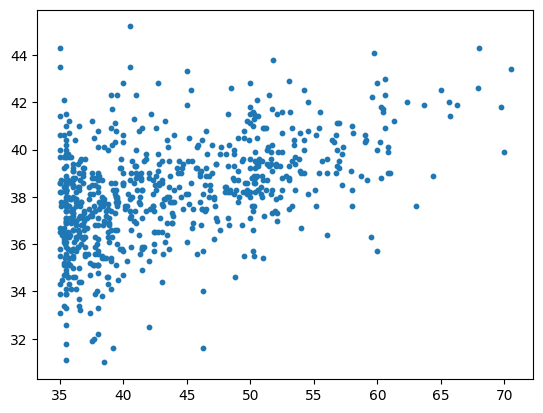

In [41]:
plt.scatter(x=df_j['difficulty_SD'], y=df_j['review_rating'], s=10)
plt.show()

difficulty_SD 와 review_rating 의 상관관계를 파악하기 위해 회귀분석 진행

In [42]:
from sklearn import linear_model

reg = linear_model.LinearRegression()


In [43]:
train_X = np.reshape(df_j['difficulty_SD'].to_numpy(), (-1,1))
y = df_j['review_rating'].to_numpy()
train_X.shape

(726, 1)

In [44]:
reg.fit(train_X, df_j['review_rating'])

LinearRegression()

In [45]:
df_j['ratingXdiff'] = reg.predict(train_X)
df_j

,type,state,department_count,review_rating,review_count,difficulty_SD,difficulty_rank,ratingXdiff
name,,,,,,,,
Aikoku Gakuen University,Private,Chiba Ken,1,36.8,11.0,38.0,F,37.405408
Seiwa University,Private,Chiba Ken,1,31.9,27.0,37.5,F,37.337094
Fukuoka Jo Gakuin Nursing University,Private,Fukuoka Ken,1,45.2,34.0,40.5,E,37.746977
Tokiwakai Gakuen University,Private,Osaka Fu,1,38.2,33.0,35.0,F,36.995526
Hokkaido Chitose College of Rehabilitation,Private,Hokkai Do,1,36.9,13.0,35.5,F,37.063839
...,...,...,...,...,...,...,...,...
University of Tsukuba,National,Ibaraki Ken,97,41.7,1121.0,60.4,A,40.465863
Kyushu University,National,Fukuoka Ken,105,40.4,1057.0,59.1,A,40.288247
Tokai University,Private,Kanagawa Ken,120,38.0,1430.0,43.4,E,38.143196


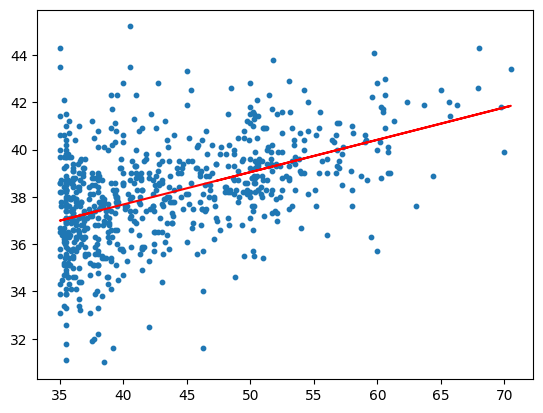

In [28]:
plt.scatter(x=df_j['difficulty_SD'], y=df_j['review_rating'], s=10)
plt.plot(df_j['difficulty_SD'], df_j['ratingXdiff'], color='red')
plt.show()

In [29]:
from sklearn.metrics import mean_absolute_error, r2_score

mae = mean_absolute_error(df_j['ratingXdiff'], df_j['review_rating'])
r2 = r2_score(df_j['ratingXdiff'], df_j['review_rating'])
print(mae,r2)

1.469056070957347 -2.3706654653587784


대학의 타입별 분석

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

df = pd.read_csv('data/japanese_universities.csv')
df_j = df[[ 'name' , 'type' , 'state' ,'department_count', 'review_rating', 'review_count','difficulty_SD' ,'difficulty_rank']]
df_j = df_j[~(df_j['difficulty_rank']== 'F')]
df_j = df_j.dropna()
df_j

,name,type,state,department_count,review_rating,review_count,difficulty_SD,difficulty_rank
0,Hokkaido University,National,Hokkai Do,78,4.16,1389.0,60.4,A
1,Hokkaido University of Education,National,Hokkai Do,8,3.79,544.0,47.1,D
3,Otaru University of Commerce,National,Hokkai Do,6,3.80,257.0,50.0,C
4,Obihiro University of Agriculture And Veterina...,National,Hokkai Do,5,4.20,87.0,54.5,B
5,Asahikawa Medical University,National,Hokkai Do,4,3.93,76.0,56.8,B
...,...,...,...,...,...,...,...,...
789,Kumamoto Gakuen University,Private,Kumamoto Ken,17,3.80,290.0,39.4,E
791,Kyushu Lutheran College,Private,Kumamoto Ken,3,4.28,44.0,40.0,E
794,Kumamoto Health Science University,Private,Kumamoto Ken,5,4.11,85.0,39.3,E
797,Ritsumeikan Asia Pacific University,Private,Oita Ken,5,3.94,195.0,50.6,C


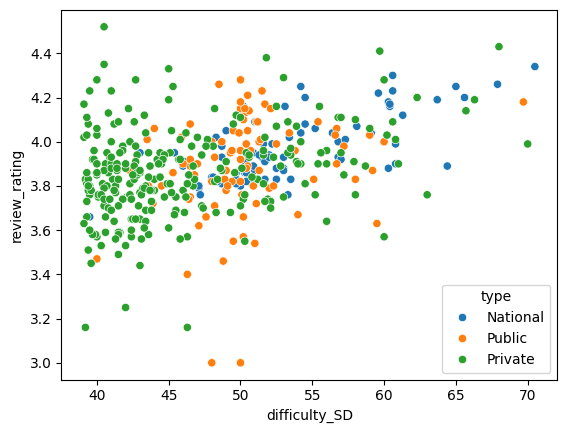

In [12]:
# sns.scatterplot(data=df_j, x= 'difficulty_SD',y='review_rating',hue='difficulty_rank')
# plt.show()
sns.scatterplot(data=df_j, x= 'difficulty_SD',y='review_rating',hue='type')
plt.show()

분류모델을 통해  실제로 어떻게 분류되는지를 진행해 보았다.

In [13]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

train_X = df_j[['difficulty_SD','review_rating']].to_numpy()
train_X = scaler.fit_transform(train_X)
y = df_j['type'].to_numpy()
# type -> difficulty_rank

In [14]:
from sklearn.linear_model import LogisticRegression

lreg = LogisticRegression(random_state=0)
lreg.fit(train_X, y)


LogisticRegression(random_state=0)

In [15]:
lreg.coef_

array([[ 1.97213188,  0.6998453 ],
       [-2.60017887, -0.07337431],
       [ 0.62804699, -0.62647099]])

In [16]:
test_X = np.random.rand(500,2)

pred = lreg.predict(test_X)

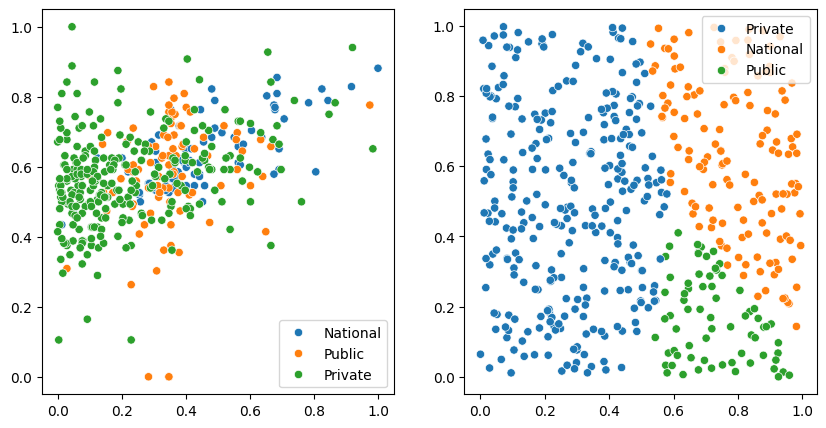

In [17]:
plt.figure(figsize = (10,5))
ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)
sns.scatterplot(x= train_X[:,0],y=train_X[:,1],hue=y, ax = ax1)
sns.scatterplot(x= test_X[:,0],y=test_X[:,1],hue=pred, ax = ax2)
plt.show()

특징 데이터를 가지고 분류를 진행해보았다.

private 대학은 넓은 범위에서 다양하게 있었고,

National과 Public은 diff_SD가 중간부터 시작한다.

특히 National은 Public과 다르게 넞은 ratting의 대학이 없다.

In [57]:
clear()

# 군집화 모델

In [58]:
from pathlib import Path
import pandas as pd
import numpy as np

df = pd.read_csv('data/japanese_universities.csv')
df_j = df[[ 'name' , 'type' , 'state' ,'department_count', 'review_rating', 'review_count','difficulty_SD' ,'difficulty_rank']]

# df_j['review_rating'] = df_j[df_j['review_rating']*10]
df_j = df_j.sort_values('department_count', ascending = True)
# df_j = df_j[df_j['difficulty_rank']== 'A' or 'B' or 'C' or 'D' or 'E'] 
df_j = df_j[~(df_j['difficulty_rank']== 'F')]

df_j = df_j[df_j['review_count'] > 5]
df_j = df_j.dropna()
df_j

,name,type,state,department_count,review_rating,review_count,difficulty_SD,difficulty_rank
613,Kyoto College of Medical Science,Private,Kyoto Fu,1,3.86,20.0,43.0,E
478,Nagaoka University,Private,Niigata Ken,1,3.44,27.0,43.0,E
776,Fukuoka Jo Gakuin Nursing University,Private,Fukuoka Ken,1,4.52,34.0,40.5,E
266,KYOAI GAKUEN UNIVERSITY,Private,Gunma Ken,1,3.96,92.0,39.8,E
623,Momoyama Gakuin University of Education,Private,Osaka Fu,1,3.66,27.0,40.6,E
...,...,...,...,...,...,...,...,...
15,University of Tsukuba,National,Ibaraki Ken,97,4.17,1121.0,60.4,A
72,Kyushu University,National,Fukuoka Ken,105,4.04,1057.0,59.1,A
356,Tokai University,Private,Kanagawa Ken,120,3.80,1430.0,43.4,E
21,The University of Tokyo,National,Tokyo To,132,4.34,2206.0,70.5,S


In [59]:
df_j = df_j.set_index('name')

In [60]:
df_j.count()

type                428
state               428
department_count    428
review_rating       428
review_count        428
difficulty_SD       428
difficulty_rank     428
dtype: int64

In [61]:
df_j.describe()

,department_count,review_rating,review_count,difficulty_SD
count,428.000000,428.000000,428.000000,428.000000
mean,18.446262,3.888481,377.123832,48.171262
std,20.567690,0.195473,515.141768,6.667225
min,1.000000,3.160000,9.000000,39.100000
25%,5.000000,3.770000,80.500000,42.475000
50%,11.000000,3.885000,200.000000,47.650000
75%,24.250000,4.010000,436.250000,51.825000
max,149.000000,4.520000,4280.000000,70.500000


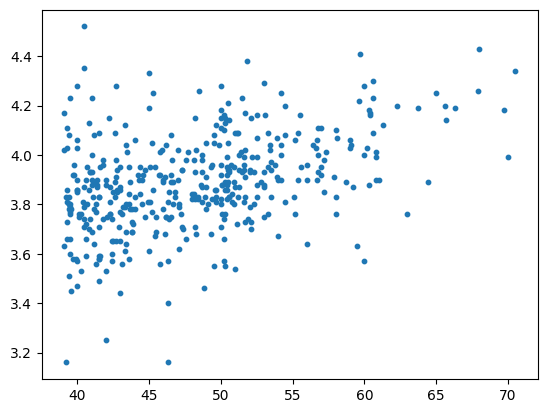

In [62]:
import matplotlib.pyplot as plt

plt.scatter(x=df_j['difficulty_SD'], y=df_j['review_rating'], s=10)
plt.show()

In [63]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


data = df_j[['difficulty_SD', 'review_rating']].to_numpy()
scaler = StandardScaler()
data = scaler.fit_transform(data)
kmeans = KMeans(n_clusters=4,    # 군집 개수 
                max_iter = 100   # 반복 횟수
               )
kmeans.fit(data)

C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(max_iter=100, n_clusters=4)

In [64]:
df_j['cluster'] = kmeans.predict(data)
df_j

,type,state,department_count,review_rating,review_count,difficulty_SD,difficulty_rank,cluster
name,,,,,,,,
Kyoto College of Medical Science,Private,Kyoto Fu,1,3.86,20.0,43.0,E,2
Nagaoka University,Private,Niigata Ken,1,3.44,27.0,43.0,E,0
Fukuoka Jo Gakuin Nursing University,Private,Fukuoka Ken,1,4.52,34.0,40.5,E,2
KYOAI GAKUEN UNIVERSITY,Private,Gunma Ken,1,3.96,92.0,39.8,E,2
Momoyama Gakuin University of Education,Private,Osaka Fu,1,3.66,27.0,40.6,E,0
...,...,...,...,...,...,...,...,...
University of Tsukuba,National,Ibaraki Ken,97,4.17,1121.0,60.4,A,1
Kyushu University,National,Fukuoka Ken,105,4.04,1057.0,59.1,A,1
Tokai University,Private,Kanagawa Ken,120,3.80,1430.0,43.4,E,0


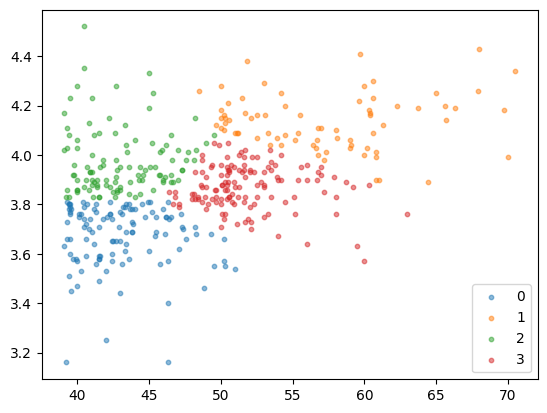

In [65]:
for i in range(4):
    c_df = df_j[df_j['cluster'] == i]
    plt.scatter(x=c_df['difficulty_SD'], y=c_df['review_rating'], s=10, alpha=0.5, label = i)

plt.legend()
plt.show()


프로그램에서 자체적으로 x,y가 모두 낮은 것, 둘 다 높은 것, 하나만 높고 하나는 낮은걸로 군집화가 이루어졌다.

#### 여러개의 매개변수를 사용하여 군집화 및 차원축소 시각화

여러개의 매개변수(컬럼)을 사용하여 군집화를 진행하는 경우 2차원으로만 표현되는 표에 시각화가 불가능 합니다.   
이때 차원축소 알고리즘을 활용하여 여러차원의 매개변수를 2차원으로 축소하여 그래표에 표현 가능합니다.   

In [66]:
usecol = ['department_count', 'review_rating', 'review_count', 'difficulty_SD']

In [67]:
data = df_j[usecol].to_numpy()
scaler = StandardScaler()
data = scaler.fit_transform(data)

kmeans = KMeans(n_clusters=4, random_state=0, n_init=10)
kmeans.fit(data)
df_j['cluster'] = kmeans.predict(data)
df_j

,type,state,department_count,review_rating,review_count,difficulty_SD,difficulty_rank,cluster
name,,,,,,,,
Kyoto College of Medical Science,Private,Kyoto Fu,1,3.86,20.0,43.0,E,0
Nagaoka University,Private,Niigata Ken,1,3.44,27.0,43.0,E,0
Fukuoka Jo Gakuin Nursing University,Private,Fukuoka Ken,1,4.52,34.0,40.5,E,2
KYOAI GAKUEN UNIVERSITY,Private,Gunma Ken,1,3.96,92.0,39.8,E,0
Momoyama Gakuin University of Education,Private,Osaka Fu,1,3.66,27.0,40.6,E,0
...,...,...,...,...,...,...,...,...
University of Tsukuba,National,Ibaraki Ken,97,4.17,1121.0,60.4,A,1
Kyushu University,National,Fukuoka Ken,105,4.04,1057.0,59.1,A,1
Tokai University,Private,Kanagawa Ken,120,3.80,1430.0,43.4,E,1


In [68]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)  # 표현할 차원수 설정
pca_data = pca.fit_transform(data)
pca_data

array([[-1.31182845e+00, -9.88522761e-02],
       [-1.94705358e+00,  1.48989261e+00],
       [-4.55759973e-01, -2.41025179e+00],
       [-1.29422144e+00, -2.11891983e-01],
       [-1.77434629e+00,  8.21733938e-01],
       [-1.17903458e+00,  6.13432003e-01],
       [-8.96763556e-01, -4.72317716e-01],
       [-7.78430214e-01, -3.47020944e-01],
       [-1.02812933e+00, -4.40491149e-01],
       [-3.34289288e-01, -1.63098367e+00],
       [-6.92391375e-01, -7.66930319e-01],
       [-7.44186161e-01, -4.05189371e-01],
       [-8.51341654e-01, -5.19155407e-01],
       [-1.20396011e+00,  1.03064847e-01],
       [-8.57160918e-01, -3.96547402e-01],
       [-4.63674392e-01, -1.29358312e+00],
       [-2.27786756e+00,  2.29171998e+00],
       [ 7.76880608e-01, -2.38133487e+00],
       [-1.42375946e+00, -2.77962499e-02],
       [-4.54137386e-01, -1.66333522e+00],
       [-1.58710479e+00,  7.53598626e-01],
       [ 7.02571719e-02, -2.03150430e+00],
       [-6.50103695e-02, -1.04876575e+00],
       [-5.

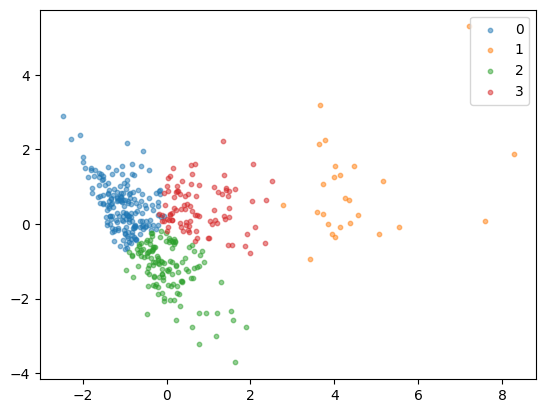

In [69]:
df_j[['pca1','pca2']] = pca_data
for i in range(4):
    c_df = df_j[df_j['cluster'] == i]
    plt.scatter(x=c_df['pca1'], y=c_df['pca2'], s=10, alpha=0.5, label = i)

plt.legend()
plt.show()
